In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = {
    'student_id': list(range(1, 11)),
    'name': [
        'Alia', 'Vicky', 'Priya', 'Rocky', 'Eva',
        'Payal', 'Simran', 'Omkar', 'Shruti', 'Sahil'
    ],
    'gender': [
        'Female', 'Male', 'F', 'Male', np.nan,
        'Female', 'Female', 'Male', 'Female', 'Male'
    ],
    'math_score': [
        88, 92, 79, 95, np.nan,
        67, 103, 85, 76, 90
    ],
    'reading_score': [
        85, 89, 80, 98, 91,
        60, 72, 88, np.nan, 92
    ],
    'writing_score': [
        82, 90, np.nan, 96, 89,
        65, 74, 87, 70, 93
    ],
    'hours_studied_per_week': [
        5, 10, 12, 15, np.nan,
        8, 20, 25, 3, 7
    ],
    'attendance_rate': [
        0.95, 0.90, 0.85, 0.98, 1.10,
        0.75, 0.80, np.nan, 0.88, 0.92
    ]
}

df = pd.DataFrame(data)
df

,student_id,name,gender,math_score,reading_score,writing_score,hours_studied_per_week,attendance_rate
0,1,Alia,Female,88.0,85.0,82.0,5.0,0.95
1,2,Vicky,Male,92.0,89.0,90.0,10.0,0.90
2,3,Priya,F,79.0,80.0,NaN,12.0,0.85
3,4,Rocky,Male,95.0,98.0,96.0,15.0,0.98
4,5,Eva,NaN,NaN,91.0,89.0,NaN,1.10
5,6,Payal,Female,67.0,60.0,65.0,8.0,0.75
6,7,Simran,Female,103.0,72.0,74.0,20.0,0.80
7,8,Omkar,Male,85.0,88.0,87.0,25.0,NaN
8,9,Shruti,Female,76.0,NaN,70.0,3.0,0.88
9,10,Sahil,Male,90.0,92.0,93.0,7.0,0.92


In [8]:
# Missing values per column
print(df.isnull().sum(), '\n')

# Check unique categories for 'gender' (inconsistencies: 'F' vs 'Female')
print(df['gender'].value_counts(dropna=False))

student_id                0
name                      0
gender                    1
math_score                1
reading_score             1
writing_score             1
hours_studied_per_week    1
attendance_rate           1
dtype: int64 

gender
Female    4
Male      4
F         1
NaN       1
Name: count, dtype: int64


In [9]:
# 1. Normalize gender labels
df['gender'] = df['gender'].replace({'F': 'Female'})

# 2. Fill missing genders with mode
mode_gender = df['gender'].mode()[0]
df['gender'] = df['gender'].fillna(mode_gender)

# 3. Impute numeric columns with column mean
num_cols = [
    'math_score', 'reading_score', 'writing_score',
    'hours_studied_per_week', 'attendance_rate'
]

for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Verify no missing values remain
print(df.isnull().sum())

student_id                0
name                      0
gender                    0
math_score                0
reading_score             0
writing_score             0
hours_studied_per_week    0
attendance_rate           0
dtype: int64


In [10]:
# Using IQR method to identify outliers
outliers = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    mask = (df[col] < low) | (df[col] > high)
    outliers[col] = df.loc[mask, col].tolist()

outliers

{'math_score': [],
 'reading_score': [60.0],
 'writing_score': [],
 'hours_studied_per_week': [25.0],
 'attendance_rate': [1.1]}

In [11]:
# Cap values below/above the [low, high] to those thresholds
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df[col] = np.where(df[col] < low, low, df[col])
    df[col] = np.where(df[col] > high, high, df[col])

# Re‑check outliers
_ = {col: df[(df[col] < low) | (df[col] > high)][col].tolist()
     for col in num_cols}
print("Remaining outliers (should be none):", _)

Remaining outliers (should be none): {'math_score': [88.0, 92.0, 79.0, 95.0, 86.11111111111111, 67.0, 103.0, 85.0, 76.0, 90.0], 'reading_score': [85.0, 89.0, 80.0, 98.0, 91.0, 66.68055555555557, 72.0, 88.0, 83.88888888888889, 92.0], 'writing_score': [82.0, 90.0, 82.88888888888889, 96.0, 89.0, 65.0, 74.0, 87.0, 70.0, 93.0], 'hours_studied_per_week': [5.0, 10.0, 12.0, 15.0, 11.666666666666666, 8.0, 20.0, 24.75, 3.0, 7.0], 'attendance_rate': []}


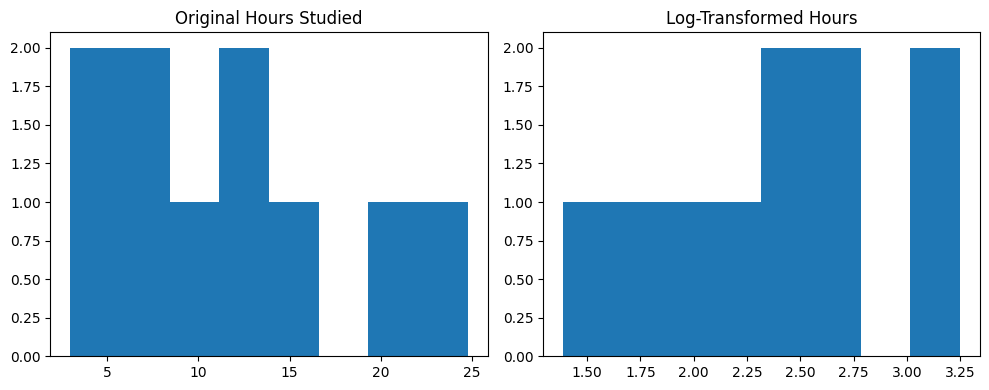

In [12]:
# Add a small constant to avoid log(0)
df['hours_log'] = np.log1p(df['hours_studied_per_week'])

# Compare distributions
fig, axs = plt.subplots(1, 2, figsize=(10,4))
axs[0].hist(df['hours_studied_per_week'], bins=8)
axs[0].set_title('Original Hours Studied')
axs[1].hist(df['hours_log'], bins=8)
axs[1].set_title('Log-Transformed Hours')
plt.tight_layout()
plt.show()

In [13]:
df.head()

,student_id,name,gender,math_score,reading_score,writing_score,hours_studied_per_week,attendance_rate,hours_log
0,1,Alia,Female,88.000000,85.0,82.000000,5.000000,0.95,1.791759
1,2,Vicky,Male,92.000000,89.0,90.000000,10.000000,0.90,2.397895
2,3,Priya,Female,79.000000,80.0,82.888889,12.000000,0.85,2.564949
3,4,Rocky,Male,95.000000,98.0,96.000000,15.000000,0.98,2.772589
4,5,Eva,Female,86.111111,91.0,89.000000,11.666667,1.07,2.538974
